# River Sampling

This notebook contains the code for the river sampling experiment in the paper. This is part of the pretraining step whereby a controlled number of random sections of rivers across India are sampled and the MAE model's decoder is trained on this dataset.

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

## Read OSM data for rivers within India

Override with local paths if needed

In [7]:
from project_config import RIVER_NETWORKS_DIR

rivers_file = os.path.join(RIVER_NETWORKS_DIR, 'rivers-osm-india.geojson')
boundaries_file = os.path.join(RIVER_NETWORKS_DIR, 'gadm41_IND_0.json')

<AxesSubplot: >

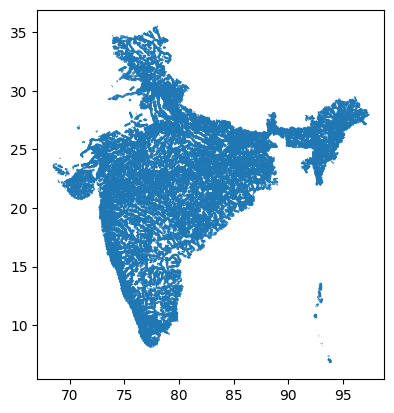

In [5]:
rivers = gpd.read_file(rivers_file)
rivers.plot()

<AxesSubplot: >

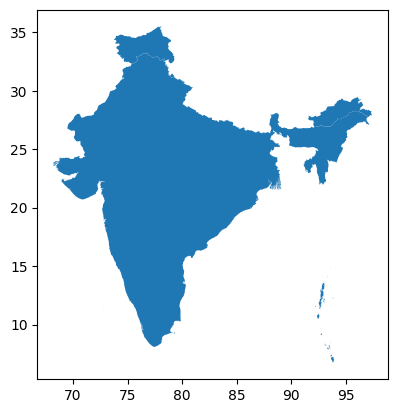

In [9]:
boundary = gpd.read_file(boundaries_file)
boundary.plot()

In [12]:
rivers.count()

id              26810
@id             26810
AND_a_w             1
FIXME              47
GNS:dsg_code      299
                ...  
wikipedia:ta        2
wikipedia:ur        1
zhb_code            4
@relations       3465
geometry        26810
Length: 314, dtype: int64

## Keep only the longer rivers, ignoring smaller tributaries

In [13]:
rivers_subset = rivers.to_crs(rivers.estimate_utm_crs()) #convert to closest UTM to get into meters
rivers_subset['river_length_m'] = rivers_subset.geometry.length
#sort rivers by length in descending order
rivers_subset = rivers_subset.sort_values(by='river_length_m', ascending=False)
rivers_subset.head(20)

,id,@id,AND_a_w,FIXME,GNS:dsg_code,GNS:dsg_string,GNS:id,GNS:uni,TODO,abandoned:ford,...,wikipedia:ne,wikipedia:pa,wikipedia:pnb,wikipedia:ru,wikipedia:ta,wikipedia:ur,zhb_code,@relations,geometry,river_length_m
23813,relation/8385364,relation/8385364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-46758.910 2497027.852, -46770.223...",1.016531e+06
4876,relation/2858525,relation/2858525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-275672.419 2119730.579, -275610.9...",8.608871e+05
20017,relation/325822,relation/325822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (479201.982 3008595.659, 479313.094...",5.884910e+05
23177,relation/6590126,relation/6590126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-135098.190 2936025.502, -135149.0...",5.879799e+05
25035,relation/13679486,relation/13679486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (184203.826 3230166.511, 184207.659...",5.840169e+05
2908,relation/3757421,relation/3757421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (101023.788 1506685.272, 100968.785...",5.784227e+05
25676,relation/11109440,relation/11109440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (-253722.391 2796729.555, -253734.6...",5.639060e+05
14078,relation/12559153,relation/12559153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (877499.258 2620626.247, 877554.089...",5.621012e+05
5475,relation/6048895,relation/6048895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (227101.232 2406220.997, 227101.676...",5.234919e+05
15883,relation/5904028,relation/5904028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (1819884.351 2863629.816, 1819798.6...",5.104714e+05


In [14]:
rivers_subset.crs

<Derived Projected CRS: EPSG:32644>
Name: WGS 84 / UTM zone 44N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°E and 84°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Nepal. Russian Federation. Sri Lanka.
- bounds: (78.0, 0.0, 84.0, 84.0)
Coordinate Operation:
- name: UTM zone 44N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
rivers_above50km = rivers_subset[rivers_subset.river_length_m > 50000].copy().to_crs(rivers.crs) #go back to WGS84
rivers_above50km

,id,@id,AND_a_w,FIXME,GNS:dsg_code,GNS:dsg_string,GNS:id,GNS:uni,TODO,abandoned:ford,...,wikipedia:ne,wikipedia:pa,wikipedia:pnb,wikipedia:ru,wikipedia:ta,wikipedia:ur,zhb_code,@relations,geometry,river_length_m
23813,relation/8385364,relation/8385364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (75.68990 22.49227, 75.68977 22.492...",1.016531e+06
4876,relation/2858525,relation/2858525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (73.64520 19.02361, 73.64581 19.022...",8.608871e+05
20017,relation/325822,relation/325822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (80.79000 27.19992, 80.79112 27.200...",5.884910e+05
23177,relation/6590126,relation/6590126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (74.64002 26.40294, 74.63953 26.402...",5.879799e+05
25035,relation/13679486,relation/13679486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (77.75362 29.16083, 77.75367 29.160...",5.840169e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17644,way/329076388,way/329076388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (85.37521 26.16234, 85.37745 26.161...",5.006230e+04
13677,way/211042347,way/211042347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (80.46606 24.22809, 80.46653 24.228...",5.003987e+04
12811,way/44594341,way/44594341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ { ""role"": """", ""rel"": ""12559122"", ""reltags"": ...","LINESTRING (83.13542 22.05367, 83.13627 22.048...",5.002528e+04
19296,way/338305059,way/338305059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ { ""role"": """", ""rel"": ""13145177"", ""reltags"": ...","LINESTRING (92.45285 27.21444, 92.45607 27.211...",5.002173e+04


<AxesSubplot: >

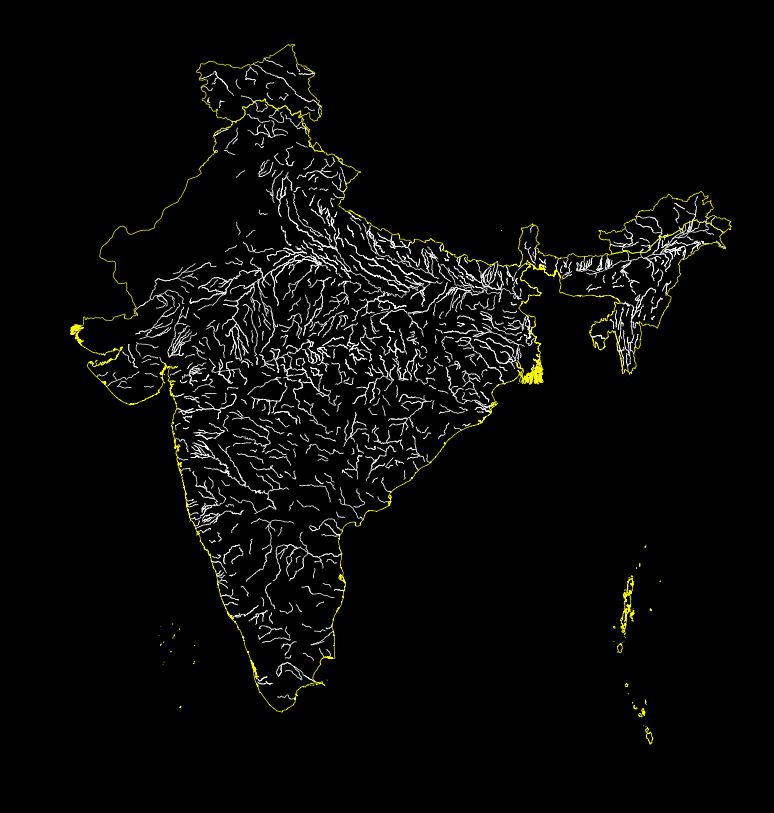

In [17]:
plt.figure(figsize=(10,10), facecolor='black')
#set background color to black
ax = plt.gca()
ax.set_facecolor('black')
# 
boundary.plot(ax=ax, facecolor='none', edgecolor='yellow', linewidth=0.5)
rivers_above50km.plot(ax=ax, linewidth=0.5, color='white' )

In [18]:
xx = rivers_above50km.dissolve(by='name')
xx

,geometry,id,@id,AND_a_w,FIXME,GNS:dsg_code,GNS:dsg_string,GNS:id,GNS:uni,TODO,...,wikipedia:en,wikipedia:ne,wikipedia:pa,wikipedia:pnb,wikipedia:ru,wikipedia:ta,wikipedia:ur,zhb_code,@relations,river_length_m
name,,,,,,,,,,,,,,,,,,,,,
Aagar,"LINESTRING (81.48811 22.35084, 81.49014 22.351...",way/262578451,way/262578451,None,None,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,None,107233.864380
Aai,"LINESTRING (90.58089 26.55990, 90.58189 26.559...",relation/6101875,relation/6101875,None,None,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,None,73850.851234
Aami,"LINESTRING (83.05580 26.87157, 83.05558 26.871...",way/319560097,way/319560097,None,None,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,None,115418.097240
Achenkovil,"LINESTRING (76.84067 9.24531, 76.83915 9.24525...",way/84273267,way/84273267,None,None,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,"[ { ""role"": ""main_stream"", ""rel"": ""15463984"", ...",74179.381683
Adan,"MULTILINESTRING ((77.19348 20.32017, 77.19534 ...",relation/6048883,relation/6048883,None,None,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,"[ { ""role"": ""main_stream"", ""rel"": ""6048883"", ""...",206415.846843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zara Chu,"LINESTRING (77.66321 33.47386, 77.67548 33.468...",way/304798148,way/304798148,None,None,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,None,90548.000349
alexnagar river,"LINESTRING (75.63627 12.14840, 75.63691 12.147...",way/482703881,way/482703881,None,None,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,None,50511.122923
دریائے جہلم,"MULTILINESTRING ((75.39076 33.38641, 75.39084 ...",relation/8306691,relation/8306691,None,None,None,None,None,None,None,...,None,None,NaN,NaN,None,None,None,None,"[ { ""role"": ""main_stream"", ""rel"": ""8306691"", ""...",291794.053679


In [20]:
#how many of the rows have some non nan value in the name column
rivers_above50km.name.count(),rivers_above50km.name.nunique()

1118

In [31]:
#total the length of all rivers
print("Length of all rivers in subset (>50km)" , rivers_above50km.river_length_m.sum()/1000.0)

print("Length of all rivers in subset (>50km, names combined)" , xx.river_length_m.sum()/1000.0)



Length of all rivers in subset (>50km) 127024.3283675015
Length of all rivers in subset (>50km, names combined) 78722.22610712874


<AxesSubplot: >

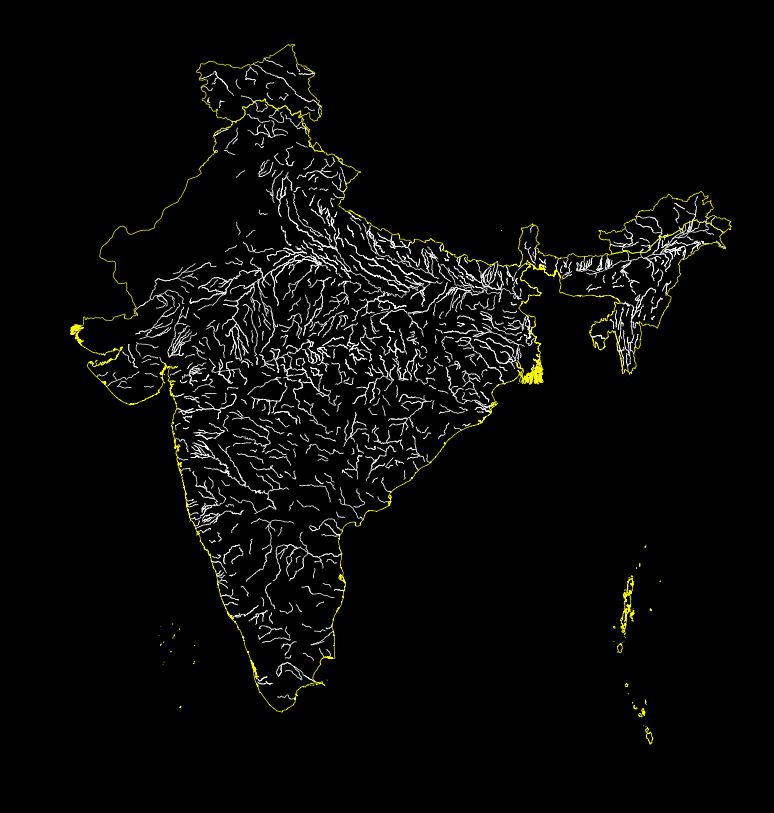

In [32]:
plt.figure(figsize=(10,10), facecolor='black')
#set background color to black
ax = plt.gca()
ax.set_facecolor('black')
# 
boundary.plot(ax=ax, facecolor='none', edgecolor='yellow', linewidth=0.5)
rivers_above50km.plot(ax=ax, linewidth=0.5, color='white' )